# Gradient Descent

In this exercise, you will create the necessary functions to go through the steps of a single Gradient Descent Epoch. You will then combine the functions and create a loop through the entire Gradient Descent procedure.

## 1. Data Exploration

Importing dataset of ingredients with their mineral content

In [1]:
import pandas as pd

data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/gradient_descent_ingredients_zinc_phosphorous.csv")
data.head()

,aliment,zinc,phosphorus
0,Durum wheat pre-cooked. whole grain. cooked. u...,0.120907,0.193784
1,Asian noodles. plain. cooked. unsalted,0.047859,0.060329
2,Rice. brown. cooked. unsalted,0.156171,0.201097
3,Rice. cooked. unsalted,0.065491,0.045704
4,Rice. parboiled. cooked. unsalted,0.025189,0.045704


👇 We can visualize a somewhat Linear relationship between the `Phosphorus` and `Zinc`.   

Let's use Gradient Descent to find the line of best fit between them! 

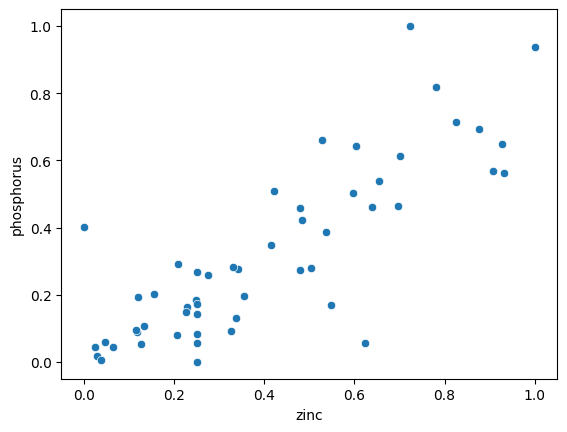

In [2]:
import seaborn as sns

sns.scatterplot(data=data, x='zinc', y='phosphorus');

❓ Create the two `np.Array`
- `data_X` for zinc
- `data_Y` for phosphorus

In [3]:
data_X = data["zinc"]
data_Y = data["phosphorus"]

In [4]:
assert (data_X.shape == (53,))
assert (data_Y.shape == (53,))

## 2. Code one Epoch

In this section of the exercise, you will define the key functions used to update the parameters during one epoch $\color {red}{(k)}$ of gradient descent. Recall the formula below

$$
\beta_0^{\color {red}{(k+1)}} = \beta_0^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_0}(\beta^{\color{red}{(k)}})
$$


$$
\beta_1^{\color {red}{(k+1)}} = \beta_1^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_1}(\beta^{\color {red}{(k)}})
$$


### 2.1 Hypothesis Function

$$
\hat{y} =  a x + b
$$

❓ Define the hypothesis function of a Linear Regression. Let `a` be the slope and `b` the intercept.


In [5]:
def h(X,a,b):
    return a*X+b

### 2.2 Loss Function

$$
Sum\ Squares\ Loss = \sum_{i=0}^n (y^{(i)} - \hat{y}^{(i)} )^2
$$

❓ Define the SSR Loss Function for the Hypothesis Function using the equation above. Reuse the function `h` coded above when writing your new function.


In [6]:
import numpy as np

def loss(X,Y,a,b):
    return np.sum((Y - h(X,a,b))**2)

❓ What would be the total Loss computed on all our ingredients dataset if:
- a = 1 
- b = 1

In [7]:
result = loss(data_X, data_Y, 1,1)
result

63.868506986115456

⚠️ You should be getting 63.86. If not, something is wrong with your function. Fix it before moving on!

### 2.3 Gradient

$$
\frac{d\ SSR}{d\ slope}= \sum_{i=0}^n -2  x_i (y^{(i)} - \hat{y}^{(i)} )
$$

$$
\frac{d\ SSR}{d\ intercept}= \sum_{i=0}^n -2(y^{(i)} - \hat{y}^{(i)} ) 
$$

❓ Define a function to compute the partial derivatives of the Loss Function relative to parameter `a` and `b` at a given point.


In [8]:
def gradient(X,Y,a,b):
    d_a = np.sum(-2*X*(Y-h(X,a,b)))
    d_b = np.sum(-2*(Y-h(X,a,b)))
    return d_a, d_b

❓ Using your function, what would be the partial derivatives of each parameter if:
- a = 1
- b = 1

In [9]:
result = gradient(data_X, data_Y, 1,1)
d_a = result[0]
d_b = result[1]

⚠️ You should be getting 48.45 and  115.17. If not, fix your function!

### 2.4 Step Sizes

$$
step\ size = gradient \cdot learning\ rate
$$

❓ Define a function that calculates the step sizes alongside each parameter (`a`,`b`), according to their derivatives (`d_a`, `d_b`) and a `learning_rate` equal to `0.01` by default

In [10]:
def steps(d_a,d_b, learning_rate = 0.01):
    step_a = d_a*learning_rate
    step_b = d_b*learning_rate
    return (step_a, step_b)

❓ What would be the steps (`step_a`, `step_b`) to take for the derivatives computed above for (`a`,`b`) = (1,1)?

In [11]:
result = steps(d_a,d_b, learning_rate = 0.01)
step_a = result[0]
step_b = result[1]

⚠️ The steps should be 0.48 for `a` and 1.15 for `b`

### 2.5 Update parameters (a, b)

$$
updated\ parameter = old\ parameter\ value - step\ size
$$

❓ Define a function that computes the updated parameter values from the old parameter values and the step sizes.

In [13]:
def update_params(a, b, step_a, step_b):
    a_new = a - step_a
    b_new = b - step_b
    return a_new , b_new

### 2.6 One full epoch

❓ Using the functions you just created, compute the updated parameters at the end of the first Epoch, had you started with parameters:
- a = 1
- b = 1

In [14]:
result = update_params(1, 1, step_a, step_b)
result

(0.5154093419089099, -0.1517923733301405)

⚠️ You should be getting the following values:
   - updated_a = 0.51
   - updated_b = -0.15

## 3. Gradient Descent

❓ Now that you have the necessary functions for a Gradient Descent, loop through epochs until convergence.

- Initialize parameters `a = 1` and  `b = 1`
- Consider convergence to be **100 epochs**
- Don't forget to start each new epoch with the updated parameters
- Append the values for `loss`, `a`, and `b` at each epoch to their corresponding lists called `loss_history`, `a_history` and `b_history`

In [15]:
def h(X,a,b):
       return a*X+b

def loss(X,Y,a,b):
    return np.sum((Y - h(X,a,b))**2)

def gradient(X,Y,a,b):
    d_a = np.sum(-2*X*(Y-h(X,a,b)))
    d_b = np.sum(-2*(Y-h(X,a,b)))
    return d_a, d_b

def steps(d_a,d_b, learning_rate = 0.01):
    step_a = d_a*learning_rate
    step_b = d_b*learning_rate
    return (step_a, step_b)

def update_params(a, b, step_a, step_b):
    a_new = a - step_a
    b_new = b - step_b
    return a_new , b_new

a = 1
b = 1

loss_history = []
a_history = []
b_history = []

iterations = 100

for _ in range(iterations):
    current_loss = loss(data_X, data_Y, a,b)
    loss_history.append(current_loss)
    a_history.append(a)
    b_history.append(b)
    
    #calc gradients
    d_a, d_b = gradient(data_X, data_Y, a,b)
    #calc steps
    step_a, step_b = steps(d_a, d_b, learning_rate=0.01)
    a,b = update_params(a,b,step_a,step_b)

    # Print the final parameters and loss
print(f"Final parameters: a = {a}, b = {b}")
print(f"Final loss: {loss(data_X, data_Y, a, b)}")

# Optionally, print the history of parameters and loss
#print("Loss history:", loss_history)
#print("a history:", a_history)
#print("b history:", b_history)

Final parameters: a = 0.768671510620374, b = 0.00708932115622393
Final loss: 1.0820689000878432


❓ What are the parameter values at the end of the 100 epochs? Save them to respective variables `a_100` and `b_100` 

In [16]:
a_100 = a
b_100 = b

## 4. Visual check

❓ Wrap this iterative approach into a method `gradient_descent()` which returns your `new_a`, `new_b` and `history`, a dictionary containing these lists: 
- `loss_history`
- `a_history`
- `b_history`

In [30]:
def gradient_descent(X, Y, a_init=1, b_init=1, learning_rate=0.001, n_epochs=100):
    
    a = a_init
    b = b_init
    loss_history = []
    a_history = []
    b_history = []
    
    for epoch in range(n_epochs):
        
        a_history.append(a)
        b_history.append(b)    
    
       
        loss_epoch = loss(X,Y,a,b)
        loss_history.append(loss_epoch)
       
        
        d_a, d_b = gradient(X,Y,a,b)
        step_a, step_b = steps(d_a,d_b,learning_rate)
        a, b = update_params(a, b, step_a, step_b)

    history = {'loss': loss_history, 'a': a_history, 'b': b_history}
    # $CHALLENGIFY_END
    return a, b, history

In [31]:
a_best, b_best, history = gradient_descent(data_X,data_Y, learning_rate=0.001)

❓ Plot the line of best fit through Zinc and Phosphorus using the parameters of your Gradient Descent.

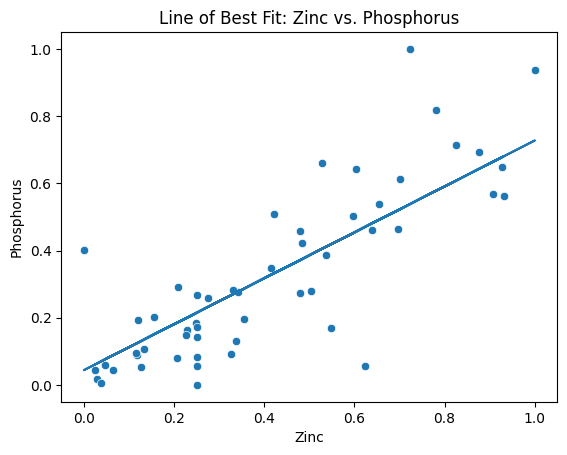

In [32]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
sns.scatterplot(x=data_X, y=data_Y)
plt.plot(data_X, h(data_X,a_best,b_best))

# Add labels and title
plt.xlabel('Zinc')
plt.ylabel('Phosphorus')
plt.title('Line of Best Fit: Zinc vs. Phosphorus')

# Save the graph as an image file
plt.savefig("line_of_best_fit.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


## 5. Visualize your descent

🎯 Our goal is to plot our loss function and the gradient descent steps on a 2D surface using matplotlib's `contourf`

❓ Start by creating the data we need for the plot
- `range_a`: a range of 100 values for `a` equally spaced between -1 and 1
- `range_b`: a range of 100 values for `b` equally spaced between -1 and 1 
- `Z`: a 2D-array where each element `Z[j,i]` is equal to the value of the loss function at `a` = `range_a[i]` and `b` = `range_b[j]`

In [33]:
range_a = np.linspace(-1,1,100)
range_b = np.linspace(-1,1,100)

In [34]:
Z = np.zeros((len(range_a),len(range_b)))
for (i, a) in enumerate(range_a):
    for (j, b) in enumerate(range_b):
        Z[j,i] = loss(data_X,data_Y,a,b)

❓ Now, plot in one single subplot:
- your loss function as a 2D-surface using matplotlib [contourf](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html) with 3 parameters
- all historical (a,b) points as a scatterplot with red dots to visualize your gradient descent!

Change your learning rate and observe its impact on the graph!

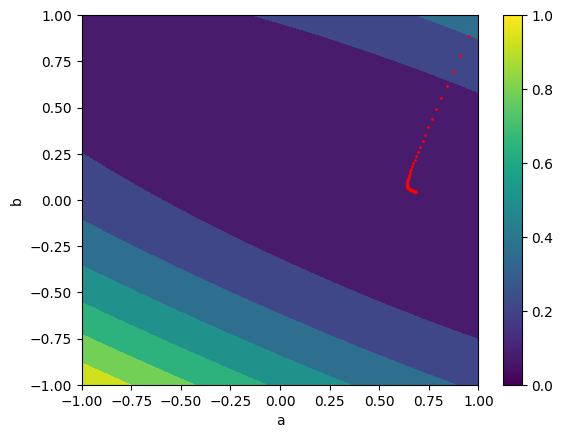

In [35]:
plt.contourf(range_a, range_b, Z)
plt.xlabel('a')
plt.ylabel('b')
plt.scatter(history['a'], history['b'], c='r', s=1)
plt.colorbar();

❓ in 3D

In [36]:
import plotly.graph_objects as go

surface = go.Surface(x=range_a, y=range_b, z=Z)
scatter = go.Scatter3d(x=history['a'], y=history['b'], z=history['loss'], mode='markers')
fig = go.Figure(data=[surface, scatter])

#fig.update_layout(title='Loss Function', autosize=False, width=500, height=500)
fig.show()

❓ Plot the history of the `loss` values as a function of the number of `epochs`. Try with multiple variations of `learning_rate` from 0.001 to 0.01 and make sure to understand the difference

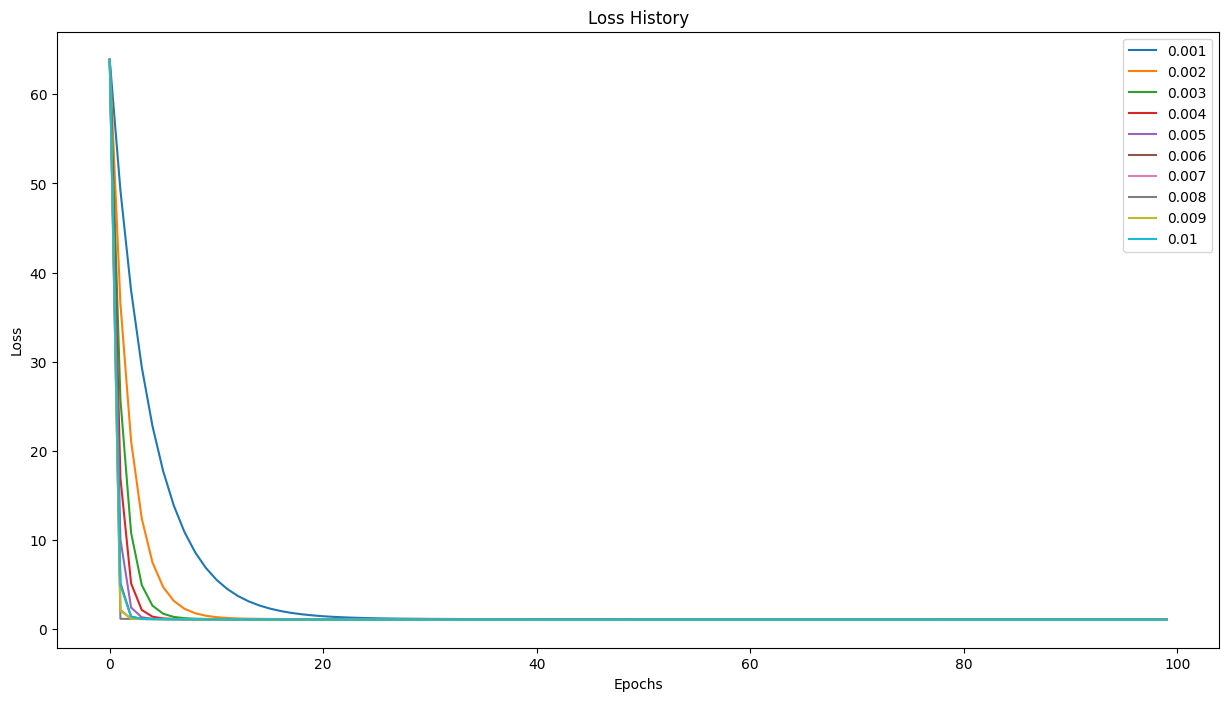

In [40]:
plt.figure(figsize=(15,8))
for l in np.linspace(0.001, 0.01, num=10):
    a_best, b_best, history = gradient_descent(data_X,data_Y, learning_rate=l)
    plt.plot(history['loss'], label=f'{round(l,5)}')
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Save the graph as an image file
plt.savefig("loss_function_of_epochs.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

## 6. With Sklearn...

❓ Using Sklearn, train a Linear Regression model on the same data. Compare its parameters to the ones computed by your Gradient Descent.

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data_X.values.reshape(-1, 1), data_Y)
slope, intercept = model.coef_, model.intercept_ 
print("Manual gradient descent parameters:", a_best, b_best)
print("Linear Regression parameters:", slope, intercept)

Manual gradient descent parameters: 0.768671510620374 0.00708932115622393
Linear Regression parameters: [0.76883717] 0.007017720201062061


In [42]:
!git add -A

!git commit -m 'Completed gradient descent excercise'

!git push origin master

[master 40cf7e6] Completed gradient descent excercise
 1 file changed, 27 insertions(+), 30 deletions(-)
 rename Gradient-Descent.ipynb => gradient-descent.ipynb (99%)
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 12 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 299.73 KiB | 3.79 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To github.com:Ilse-hutten/data-batch-gradient-descent.git
   783752b..40cf7e6  master -> master


They should be almost identical!